In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\Usha Bharati\Downloads\02-2024 Instacart Basket Analysis'

In [3]:
# Importing Datasets
filtered_data=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_filtered_data.pkl'))

In [4]:
df_all_merged=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_all_merged.pkl'))

# Q5 Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

# Creating 'Age' groupings of customers

In [5]:
# Age counts from the final dataset
filtered_data['Age'].value_counts(dropna=False)

Age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [6]:
filtered_data['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [7]:
# Creating age_category column based on age groupings
filtered_data.loc[(filtered_data['Age'] >= 18) & (filtered_data['Age']  <=40),'age_category'] = 'young adult'

In [8]:
filtered_data.loc[(filtered_data['Age'] >= 41) & (filtered_data['Age']  <=60),'age_category'] = 'middle aged'

In [9]:
filtered_data.loc[(filtered_data['Age'] >= 61) & (filtered_data['Age']  <=81),'age_category'] = 'elder'

In [10]:
filtered_data['age_category'].value_counts(dropna=False)

age_category
young adult    11148433
elder          10112607
middle aged     9703524
Name: count, dtype: int64

# Creating 'Income' groupings of customer

In [11]:
filtered_data.loc[filtered_data['income'] <= 50000,'income_category'] = 'low income'

In [12]:
filtered_data.loc[(filtered_data['income'] >= 50001) & (filtered_data['income'] <= 100000),'income_category'] = 'moderate income'

In [13]:
filtered_data.loc[(filtered_data['income'] >= 100001) & (filtered_data['income'] <= 150000),'income_category'] = 'high income'

In [14]:
filtered_data.loc[(filtered_data['income'] >= 150000),'income_category'] = 'very high income'

In [15]:
filtered_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Age,join_date,count_of_dependants,family_status,income,_merge,region,exclusion_flag,age_category,income_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,both,Midwest,False,elder,low income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,both,Midwest,False,elder,low income
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,81,8/1/2019,1,married,49620,both,Midwest,False,elder,low income
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,81,8/1/2019,1,married,49620,both,Midwest,False,elder,low income
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,81,8/1/2019,1,married,49620,both,Midwest,False,elder,low income


In [16]:
filtered_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'surname', 'Gender', 'state', 'Age', 'join_date',
       'count_of_dependants', 'family_status', 'income', '_merge', 'region',
       'exclusion_flag', 'age_category', 'income_category'],
      dtype='object')

# Categorizing customers with and without 'dependents'

In [17]:
filtered_data.loc[filtered_data['count_of_dependants'] ==0,'dependency_flag'] = 'without dependent'

In [18]:
filtered_data.loc[(filtered_data['count_of_dependants']>=1) & (filtered_data['count_of_dependants'] <=4),'dependency_flag'] = 'with dependents'

In [19]:
filtered_data['dependency_flag'].value_counts(dropna=False)

dependency_flag
with dependents      23224883
without dependent     7739681
Name: count, dtype: int64

# Q5 Creating customer profile with 'age','income','no. of dependents'

In [20]:
# Creating customer profile
filtered_data['customer_profile'] = filtered_data['age_category'] + ' , ' + filtered_data['income_category'] + ' , ' + filtered_data['dependency_flag'].astype(str)

In [21]:
filtered_data['customer_profile'].head()

0    elder , low income , with dependents
1    elder , low income , with dependents
2    elder , low income , with dependents
3    elder , low income , with dependents
4    elder , low income , with dependents
Name: customer_profile, dtype: object

# Customer profile distribution

In [22]:
filtered_data['customer_profile'].value_counts(dropna=False)

customer_profile
young adult , moderate income , with dependents       6824402
elder , high income , with dependents                 3884735
middle aged , high income , with dependents           3668383
young adult , moderate income , without dependent     2244439
elder , moderate income , with dependents             1640913
middle aged , moderate income , with dependents       1605862
elder , very high income , with dependents            1425531
middle aged , very high income , with dependents      1389798
elder , high income , without dependent               1276582
young adult , low income , with dependents            1274147
middle aged , high income , without dependent         1228862
elder , low income , with dependents                   628327
middle aged , low income , with dependents             613160
elder , moderate income , without dependent            561354
middle aged , moderate income , without dependent      518012
elder , very high income , without dependent         

In [23]:
filtered_data['customer_profile'].describe()

count                                            30964564
unique                                                 24
top       young adult , moderate income , with dependents
freq                                              6824402
Name: customer_profile, dtype: object

# Q6 Appropriate visualization to show the distribution of profiles

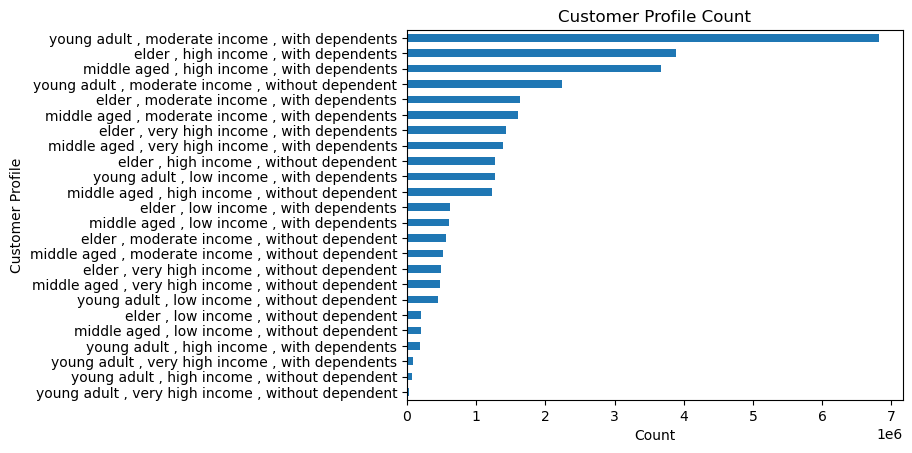

In [24]:
# Plot to understand the customer profiling counts
customer_profile_count_plot=filtered_data['customer_profile'].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Customer Profile Count')
plt.ylabel('Customer Profile')
plt.xlabel('Count')
plt.grid(False)

In [25]:
# Saving the visualization as png file
customer_profile_count_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_count_plot.png'))

# Q7 Max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [26]:
expenditure_customer_profile=filtered_data.groupby('customer_profile').agg({'prices':['mean','max','min']})

In [27]:
expenditure_customer_profile

prices              
                                                          mean      max  min
customer_profile                                                            
elder , high income , with dependents                 9.272299  99999.0  1.0
elder , high income , without dependent               9.516269  99999.0  1.0
elder , low income , with dependents                  6.509235     25.0  1.0
elder , low income , without dependent                6.523066     25.0  1.0
elder , moderate income , with dependents             8.412820  99999.0  1.0
elder , moderate income , without dependent           8.467198  99999.0  1.0
elder , very high income , with dependents           25.259304  99999.0  1.0
elder , very high income , without dependent         22.848139  99999.0  1.0
middle aged , high income , with dependents           8.854945  99999.0  1.0
middle aged , high income , without dependent        10.357592  99999.0  1.0
middle aged , low income , with dependents            6.497338     25.0  1.0
middle aged , low income , without dependent          6.489551     25.0  1.0
middle aged , moderate income , with dependents       8.657162  99999.0  1.0
middle aged , moderate income , without dependent     7.789972  14900.0  1.0
middle aged , very high income , with dependents     24.546968  99999.0  1.0
middle aged , very high income , without dependent   26.798398  99999.0  1.0
young adult , high income , with dependents          54.474144  99999.0  1.0
young adult , high income , without dependent        49.276289  99999.0  1.0
young adult , low income , with dependents            6.900503     25.0  1.0
young adult , low income , without dependent          6.904882     25.0  1.0
young adult , moderate income , with dependents       8.444253  99999.0  1.0
young adult , moderate income , without dependent     8.451054  99999.0  1.0
young adult , very high income , with dependents    299.606120  99999.0  1.0
young adult , very high income , without dependent  325.933001  99999.0  1.0

In [28]:
frequency_customer_profile=filtered_data.groupby('customer_profile').agg({'days_since_prior_order':['mean','max','min']})

In [29]:
frequency_customer_profile

days_since_prior_order  \
                                                                     mean   
customer_profile                                                            
elder , high income , with dependents                           10.755301   
elder , high income , without dependent                         10.676984   
elder , low income , with dependents                            11.102808   
elder , low income , without dependent                          11.129830   
elder , moderate income , with dependents                       10.911605   
elder , moderate income , without dependent                     10.754187   
elder , very high income , with dependents                      10.707829   
elder , very high income , without dependent                    10.732312   
middle aged , high income , with dependents                     10.892632   
middle aged , high income , without dependent                   10.783000   
middle aged , low income , with dependents                      11.197105   
middle aged , low income , without dependent                    10.861896   
middle aged , moderate income , with dependents                 10.757871   
middle aged , moderate income , without dependent               10.770864   
middle aged , very high income , with dependents                10.754658   
middle aged , very high income , without dependent              10.439339   
young adult , high income , with dependents                     11.033443   
young adult , high income , without dependent                   10.622083   
young adult , low income , with dependents                      11.243885   
young adult , low income , without dependent                    11.216162   
young adult , moderate income , with dependents                 10.696521   
young adult , moderate income , without dependent               10.855553   
young adult , very high income , with dependents                10.360155   
young adult , very high income , without dependent              10.285174   

                                                               
                                                     max  min  
customer_profile                                               
elder , high income , with dependents               30.0  0.0  
elder , high income , without dependent             30.0  0.0  
elder , low income , with dependents                30.0  0.0  
elder , low income , without dependent              30.0  0.0  
elder , moderate income , with dependents           30.0  0.0  
elder , moderate income , without dependent         30.0  0.0  
elder , very high income , with dependents          30.0  0.0  
elder , very high income , without dependent        30.0  0.0  
middle aged , high income , with dependents         30.0  0.0  
middle aged , high income , without dependent       30.0  0.0  
middle aged , low income , with dependents          30.0  0.0  
middle aged , low income , without dependent        30.0  0.0  
middle aged , moderate income , with dependents     30.0  0.0  
middle aged , moderate income , without dependent   30.0  0.0  
middle aged , very high income , with dependents    30.0  0.0  
middle aged , very high income , without dependent  30.0  0.0  
young adult , high income , with dependents         30.0  0.0  
young adult , high income , without dependent       30.0  0.0  
young adult , low income , with dependents          30.0  0.0  
young adult , low income , without dependent        30.0  0.0  
young adult , moderate income , with dependents     30.0  0.0  
young adult , moderate income , without dependent   30.0  0.0  
young adult , very high income , with dependents    30.0  0.0  
young adult , very high income , without dependent  30.0  0.0

In [120]:
profile_counts = pd.crosstab(filtered_data['customer_profile'], filtered_data['age_category'], dropna = False)
profile_counts

age_category,elder,middle aged,young adult
customer_profile,,,
"elder , high income , with dependents",3884735,0,0
"elder , high income , without dependent",1276582,0,0
"elder , low income , with dependents",628327,0,0
"elder , low income , without dependent",203163,0,0
"elder , moderate income , with dependents",1640913,0,0
"elder , moderate income , without dependent",561354,0,0
"elder , very high income , with dependents",1425531,0,0
"elder , very high income , without dependent",492002,0,0
"middle aged , high income , with dependents",0,3668383,0


# Customer analysis with certain goods in the department_id column

In [30]:
# Creating department name column with department_id
department_names = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli"
}

In [31]:
filtered_data['department_name'] = filtered_data['department_id'].map(department_names).fillna('missing')

In [32]:
filtered_data['department_name'].head()

0          snacks
1          snacks
2    meat seafood
3    meat seafood
4            bulk
Name: department_name, dtype: object

In [33]:
filtered_data['department_name'].value_counts()

department_name
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

# Creating Non-vegeterian customer dataset by mapping with certain departments

In [34]:
# Mapping orders from certain departments
non_veg_departments = ['meat seafood', 'dairy eggs', 'deli','alcohol']


In [35]:
non_veg_orders = filtered_data[filtered_data['department_name'].isin(non_veg_departments)]

In [36]:
# Group orders by user_id to find users who have ordered from these departments
non_veg_users=non_veg_orders.groupby('user_id').size().reset_index(name='order_count')

In [37]:
non_veg_users.shape

(157057, 2)

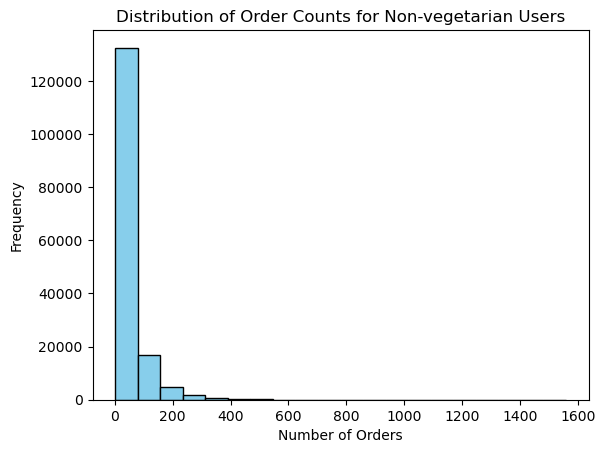

In [113]:
# Visualization to show the count of orders made by each non-vegetarian user
non_veg_users_plot=plt.hist(non_veg_users['order_count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Order Counts for Non-vegetarian Users')
plt.show()

# Distribution of Non vegeterian customers across regions

In [40]:
# Creating dataset which includes non_veg_users count across regions
non_veg_users_region = non_veg_orders.groupby('region')['user_id'].nunique().reset_index(name='user_count')

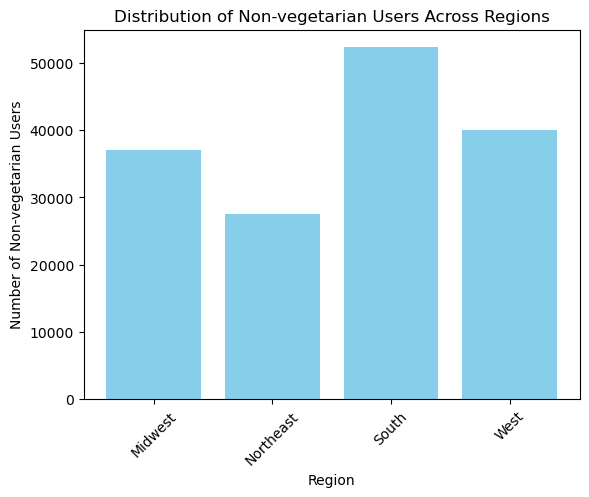

In [41]:
# Plot to observe non_veg_users count region-wise
non_veg_user_region=plt.bar(non_veg_users_region['region'], non_veg_users_region['user_count'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Non-vegetarian Users')
plt.title('Distribution of Non-vegetarian Users Across Regions')
plt.xticks(rotation=45)
plt.show()

# Creating Vegeterian customer dataset by mapping with certain departments

In [43]:
# Mapping orders from certain departments
veg_orders = filtered_data[filtered_data['department_name'].isin(['produce', 'dry goods pasta', 'pantry'])]

In [44]:
# Group orders by user_id to find users who have ordered from these departments
veg_users=veg_orders.groupby('user_id').size().reset_index(name='order_count')

In [45]:
veg_users.shape

(159460, 2)

In [46]:
veg_users_data = filtered_data[filtered_data['user_id'].isin(veg_users)]

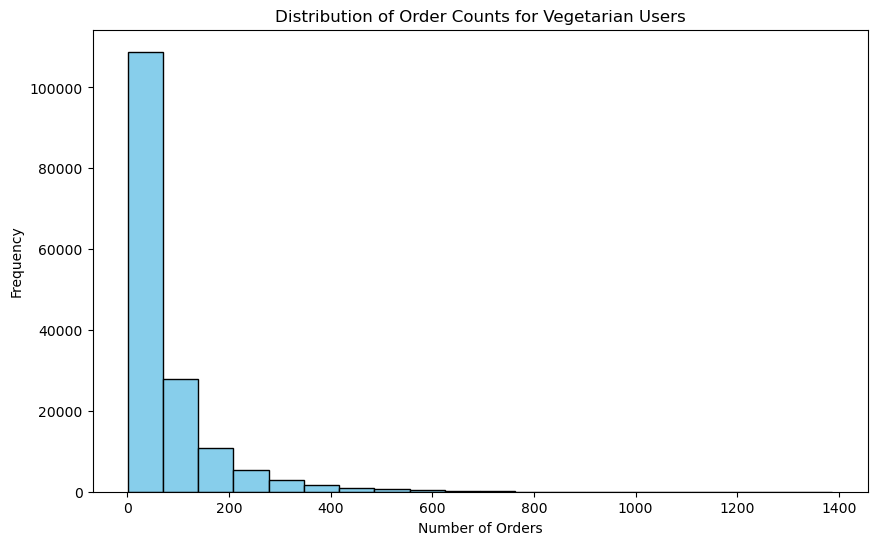

In [47]:
# Visualization to show the count of orders made by each non-vegetarian user

plt.figure(figsize=(10, 6))
plt.hist(veg_users['order_count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Order Counts for Vegetarian Users')
plt.show()

# Distribution of Vegeterian customers across regions

In [48]:
# Creating dataset which includes veg_users count across regions
veg_users_region = veg_orders.groupby('region')['user_id'].nunique().reset_index(name='user_count')

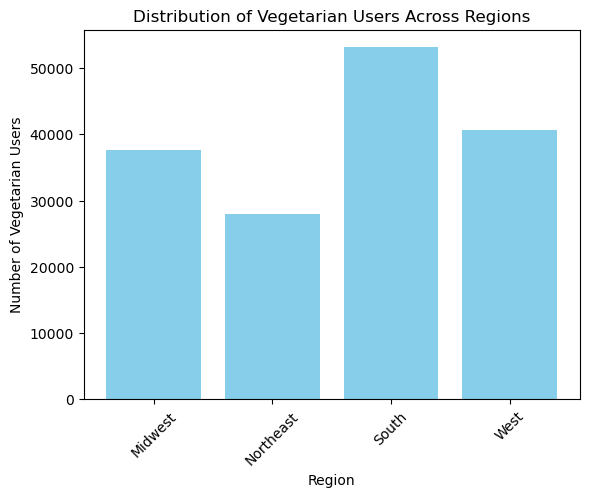

In [49]:
# Plot to observe veg_users count region-wise
plt.bar(veg_users_region['region'], veg_users_region['user_count'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Vegetarian Users')
plt.title('Distribution of Vegetarian Users Across Regions')
plt.xticks(rotation=45)
plt.show()

# The number of orders per user and the distribution of users across regions are two different aspects to measure. While the distribution of users across regions may appear similar for both vegetarian and non-vegetarian users,but their ordering behavior (as seen in the visualization)is different.

# Q8 Comparing customer profiles with region and departments.

Text(0.5, 1.0, 'Frequency by Customer profile')

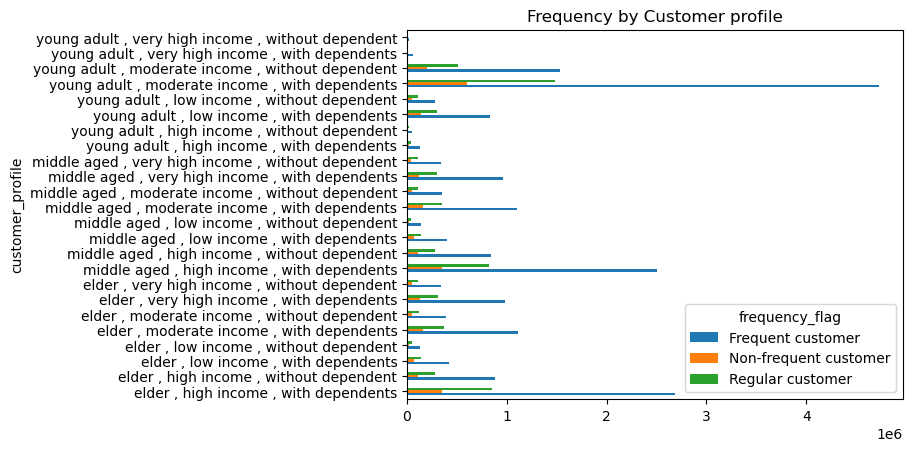

In [50]:
# Visualization to observe the customer profiling under frequency flag
customers_profile_frequency=filtered_data.groupby(['customer_profile','frequency_flag']).size().unstack().plot(kind='barh')
plt.title('Frequency by Customer profile')

In [51]:
# Saving the visualization as png file
customers_profile_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_frequency.png'))

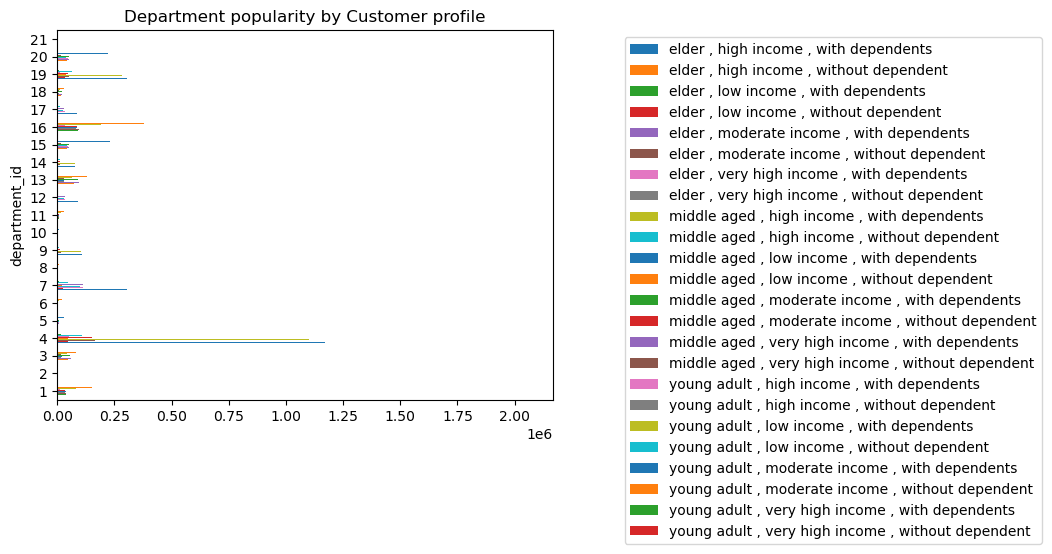

In [52]:
# Visualization to observe the customer profiling across departments
customers_profile_department=filtered_data.groupby(['department_id','customer_profile']).size().unstack().plot(kind='barh')
plt.title('Department popularity by Customer profile')

plt.legend (loc='upper right',bbox_to_anchor=(2, 1))

In [53]:
# Saving the visualization as png file
customers_profile_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_department.png'))

# Customer profile distribution across different regions


# Visualizations for the KEY QUESTIONS

# Busiest day of the week

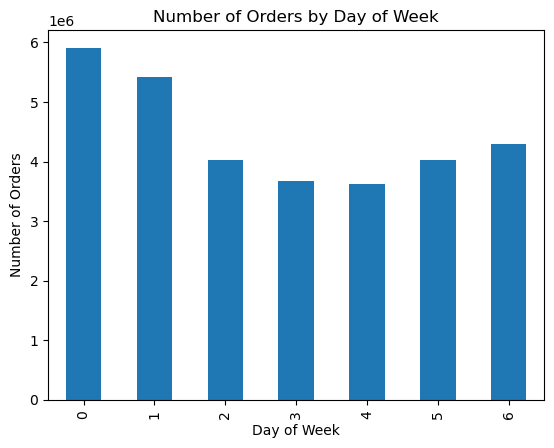

In [54]:
# Bar plot for identifying busiest days by number of orders
busiest_day_of_week=filtered_data['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(False)

In [55]:
# Saving the visualization as png file
busiest_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_day_of_week.png'))

# Busiest hour of the day

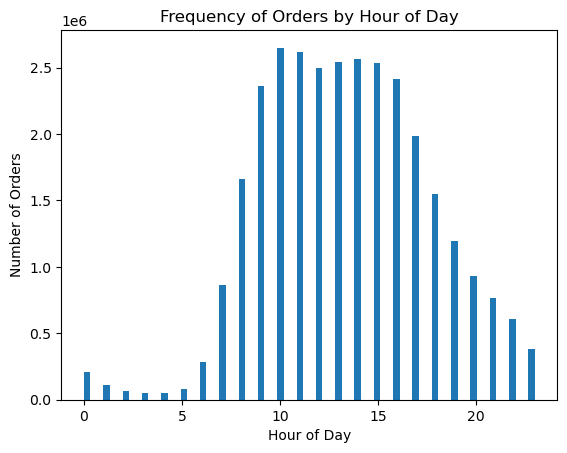

In [56]:
# Bar plot for identifying busiest hours by number of orders
busiest_hour_of_day=filtered_data['order_hour_of_day'].plot.hist(bins = 70)
plt.title('Frequency of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(False)


In [57]:
# Saving the visualization as png file
busiest_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_hour_of_day.png'))

# Particular times of the day when people spend the most money

In [59]:
# Create Sample data
np.random.seed(4)
dev_1 = np.random.rand(len(df_all_merged)) <= 0.7
# Store 70% of the sample in the data frame big
big = df_all_merged[dev_1]

In [60]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [61]:
# Store 30% of the sample in the data frame small
small = df_all_merged[~dev_1]

In [62]:
len(df_all_merged)

32404859

In [63]:
most_money_spent = small[['order_hour_of_day','prices']]

C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


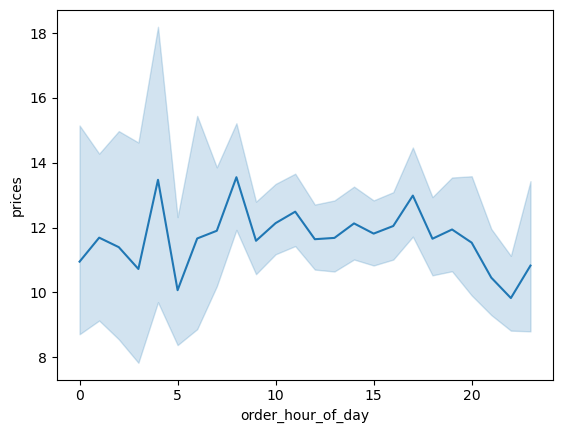

In [64]:
# Create line chart with random small sample data of the dataset
line_expenditure = sns.lineplot(data = most_money_spent, x = 'order_hour_of_day',y = 'prices')
plt.grid(False)

# Products with simpler price range grouping

In [65]:
# Price range description
filtered_data['price_range_loc'].describe()

count              30964564
unique                    3
top       Mid range product
freq               20891771
Name: price_range_loc, dtype: object

In [66]:
# Price range count
filtered_data['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid range product     20891771
Low range product      9674840
High range product      397953
Name: count, dtype: int64

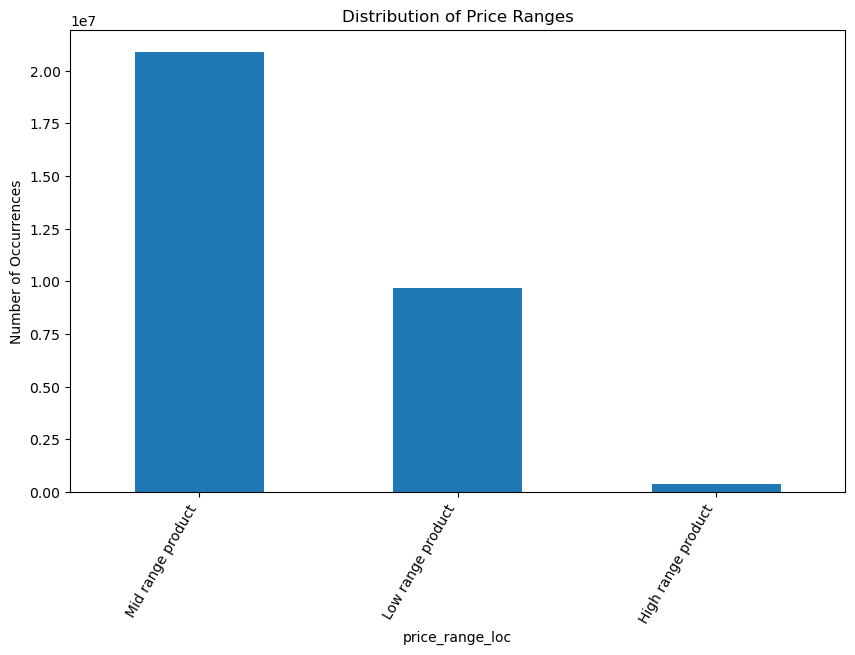

In [67]:
# Price range counts visualization
price_ranges=filtered_data['price_range_loc'].value_counts().plot(kind='bar')
plt.title('Distribution of Price Ranges')
plt.ylabel('Number of Occurrences')
plt.grid(False)
plt.xticks(rotation=60, ha='right')
plt.gcf().set_size_inches(10, 6)

In [68]:
price_ranges.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ranges.png'))

# Products that are more popular than others

In [69]:
# Finding the products count over order id
filtered_data.groupby('product_name')['order_id'].count().sort_values(ascending=False)

product_name
Banana                                          453164
Bag of Organic Bananas                          366403
Organic Strawberries                            255988
Organic Baby Spinach                            231772
Organic Hass Avocado                            206799
                                                 ...  
Blackberry Flow                                      1
Flax Oil, Organic, Omega-3, Original Formula         1
Organic ZFruit Rope Fruit Punch Flavor               1
Florentine Spinach & Cheese Pasta Sauce              1
Duplex Sandwich Creme Cookies                        1
Name: order_id, Length: 49630, dtype: int64

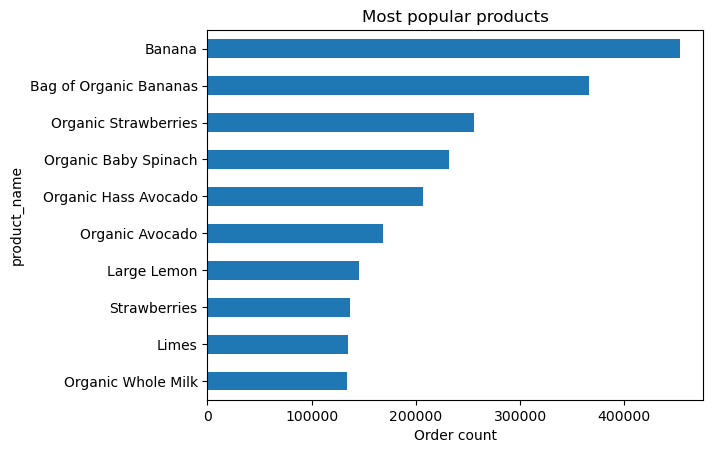

In [70]:
# Most popular product among customers
popular_product=filtered_data['product_name'].value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.title('Most popular products')
plt.xlabel('Order count')
plt.grid(False)

In [71]:
# Saving the visualization as png file
popular_product.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'popular_product.png'))

# Departments have the highest frequency of product orders

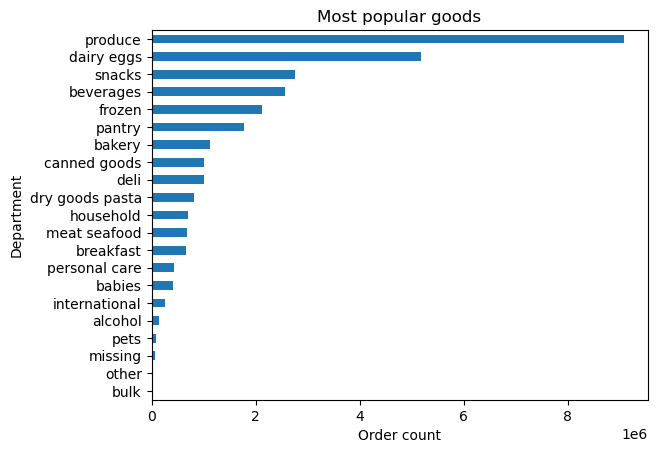

In [72]:
# Plot to understand the popularity of departments amongst customers
popular_departments=filtered_data['department_name'].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Most popular goods')
plt.xlabel('Order count')
plt.ylabel('Department')
plt.grid(False)

In [73]:
# Saving the visualization as png file
popular_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'popular_departments.png'))

# Ordering behaviour of different customers

# (a) Distribution among users in regards to their brand loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

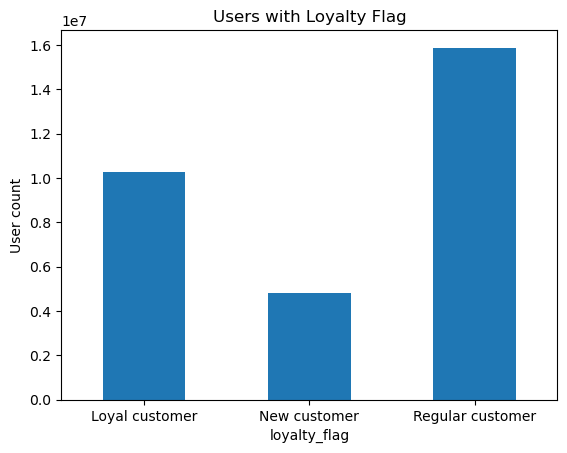

In [74]:
# Creating bar plot for loyalty user count
users_loyalty=filtered_data['loyalty_flag'].value_counts(dropna=False).sort_index().plot.bar()
plt.title('Users with Loyalty Flag')
plt.ylabel('User count')
plt.grid(False)
plt.xticks(rotation=0, ha='center')


In [75]:
# Saving the visualization as png file
users_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'users_loyalty.png'))

#  Differences in ordering habits based on a customer’s loyalty status

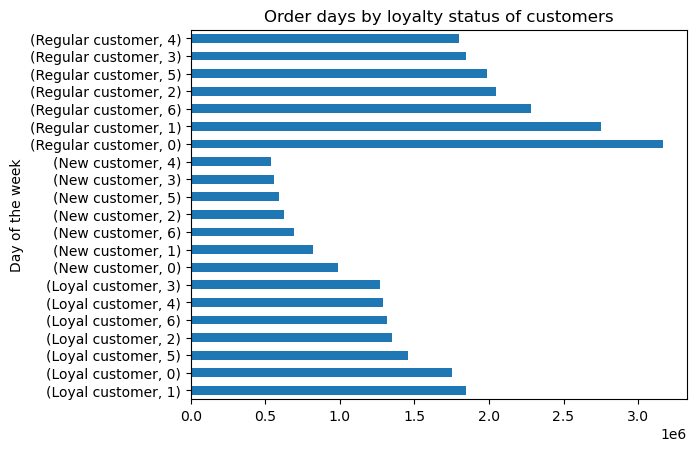

In [76]:
# Plot to understand the daily orders placed according to loyalty 
order_days_loyalty=filtered_data.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot(kind='barh')
plt.title('Order days by loyalty status of customers')
plt.ylabel('orders count')
plt.ylabel('Day of the week')
plt.grid(False)

In [77]:
# Saving the visualization as png file
order_days_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_days_loyalty.png'))

In [78]:
# Expenditure by loyalty on price range
filtered_data.groupby(['price_range_loc', 'loyalty_flag'])['prices'].sum()

price_range_loc     loyalty_flag    
High range product  Loyal customer       29326138.1
                    New customer         28177810.4
                    Regular customer     78920868.9
Low range product   Loyal customer        9760615.3
                    New customer          4521214.5
                    Regular customer     14973270.3
Mid range product   Loyal customer       67727288.8
                    New customer         31611521.3
                    Regular customer    104497554.0
Name: prices, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'High range product'),
  Text(1, 0, 'Low range product'),
  Text(2, 0, 'Mid range product')])

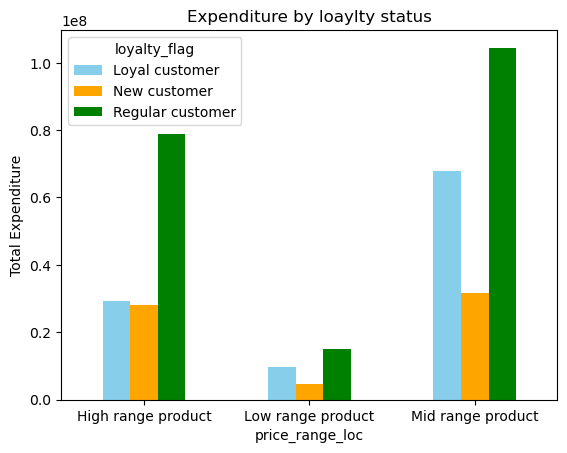

In [79]:
# Plot to observe the expenditure by loyal customers on different price ranges.
price_range_loyalty=filtered_data.groupby(['price_range_loc', 'loyalty_flag'])['prices'].sum().unstack().plot(kind='bar', color=['skyblue', 'orange','green'])
plt.title('Expenditure by loaylty status')
plt.ylabel('Total Expenditure')
plt.grid(False)
plt.xticks(rotation=0, ha='center')

In [80]:
# Saving the visualization as png file
price_range_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loyalty.png'))

In [81]:
# Loyalty flag data for different departments
filtered_data.groupby(['department_name', 'loyalty_flag']).size().unstack()

loyalty_flag,Loyal customer,New customer,Regular customer
department_name,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


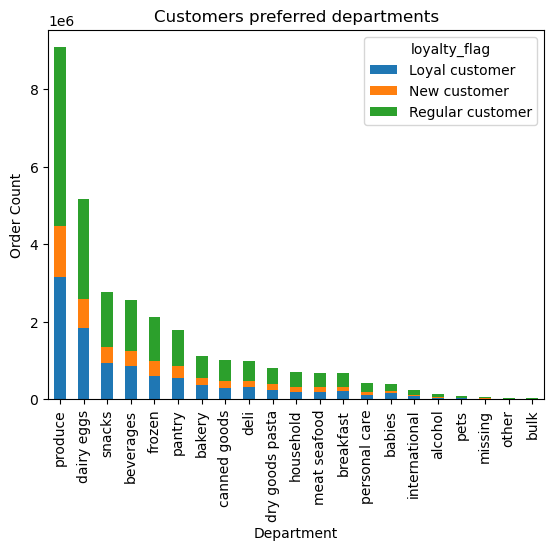

In [82]:
# Bar plot for loyalty flag over departments
goods_users_loyalty=filtered_data.groupby(['department_name', 'loyalty_flag'])['order_id'].count().unstack().sort_values(by = 'Regular customer', ascending = False).plot(kind = 'bar', stacked = True)
plt.title('Customers preferred departments')
plt.ylabel('Order Count')
plt.xlabel('Department')
plt.grid(False)

In [83]:
# Saving the visualization as png file
goods_users_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_users_loyalty.png'))

Text(0, 0.5, 'Order count')

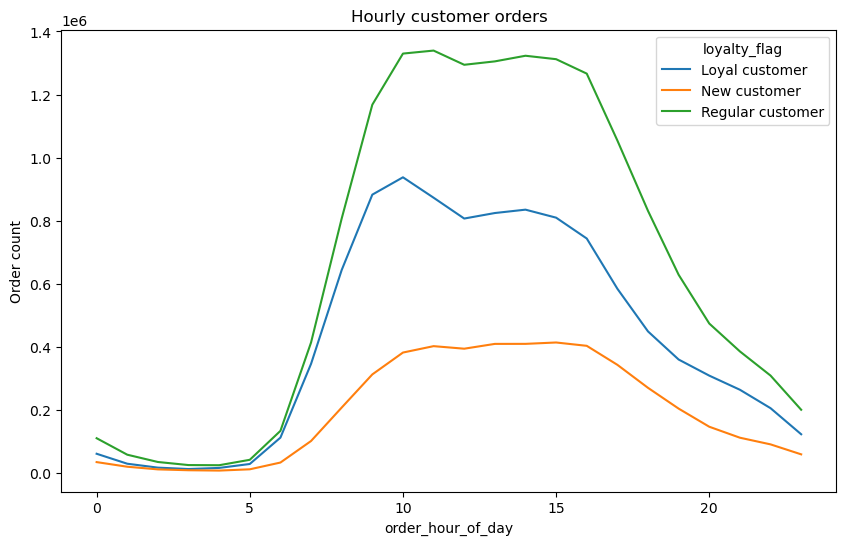

In [84]:
# Line chart which shows loyalty flag for total orders spread over hours of a day
order_hour_loyalty=filtered_data.groupby(['loyalty_flag', 'order_hour_of_day'])['order_id'].count().reset_index().pivot(index='order_hour_of_day', columns='loyalty_flag', values='order_id').plot(kind='line', figsize=(10, 6))
plt.title('Hourly customer orders')
plt.ylabel('Order count')

In [85]:
# Saving the visualization as png file
order_hour_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_loyalty.png'))

# Ordering habits based on a customer’s region

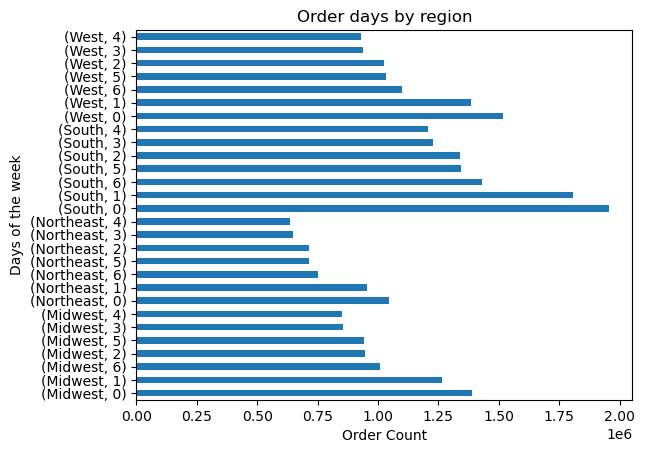

In [86]:
# Plot showing orders count by week in different region
orders_day_region=filtered_data.groupby('region')['orders_day_of_week'].value_counts().plot(kind='barh')
plt.title('Order days by region')
plt.xlabel('Order Count')
plt.ylabel('Days of the week')
plt.grid(False)

In [87]:
# Saving the visualization as png file
orders_day_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_region.png'))

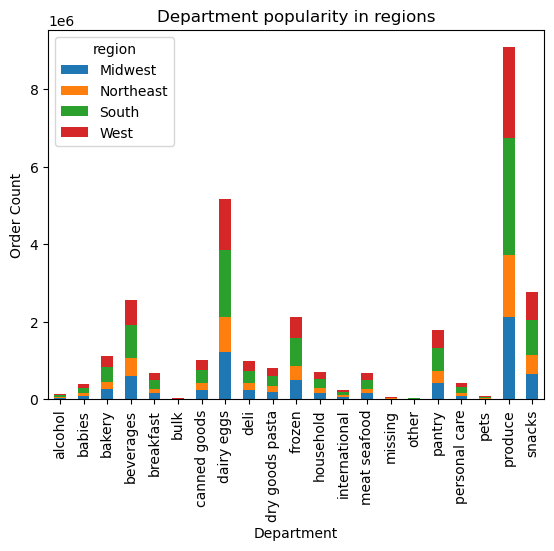

In [88]:
# Bar plot showing region-wise order counts in each department
department_region_plot=filtered_data.groupby(['department_name', 'region'])['order_id'].count().unstack().plot(kind = 'bar', stacked = True)
plt.title('Department popularity in regions')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.grid(False)

In [89]:
# Saving the visualization as png file
department_region_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_plot.png'))

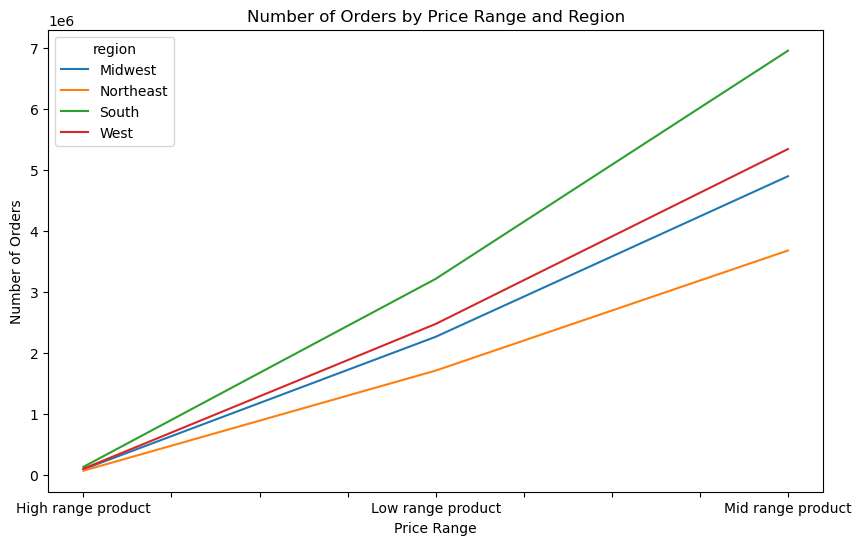

In [90]:
# Line plot to understand the price category orders in each region.
price_range_region_plot=filtered_data.groupby(['price_range_loc', 'region'])['order_id'].count().unstack().plot(kind='line', figsize=(10, 6))
plt.title('Number of Orders by Price Range and Region')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.grid(False)

In [91]:
# Saving the visualization as png file
price_range_region_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_plot.png'))

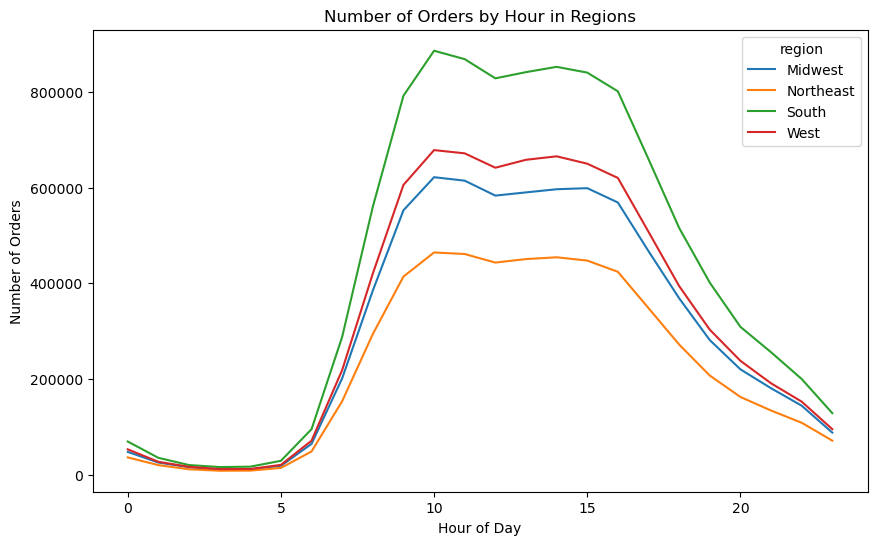

In [92]:
# Line plot for the region wise order counts distributed on hourly basis over a day.
hour_orders_region_plot=filtered_data.groupby(['region', 'order_hour_of_day'])['order_id'].count().reset_index().pivot(index='order_hour_of_day', columns='region', values='order_id').plot(kind='line', figsize=(10, 6))
plt.title('Number of Orders by Hour in Regions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(False)

In [93]:
# Saving the visualization as png file
hour_orders_region_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_plot.png'))

#  Age and family status in terms of ordering habits.

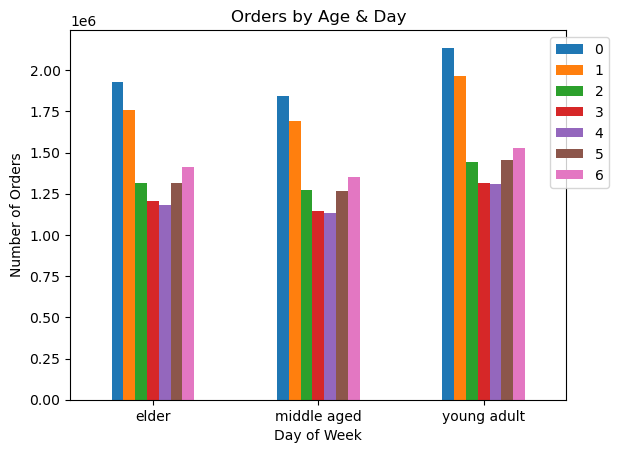

In [94]:
# Bar plot to observe the order count for different age groups over a week
age_days_week_plot=filtered_data.groupby(['age_category', 'orders_day_of_week']).size().unstack().plot(kind='bar')
plt.title('Orders by Age & Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))


In [95]:
# Saving the visualization as png file
age_days_week_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_days_week_plot.png'))

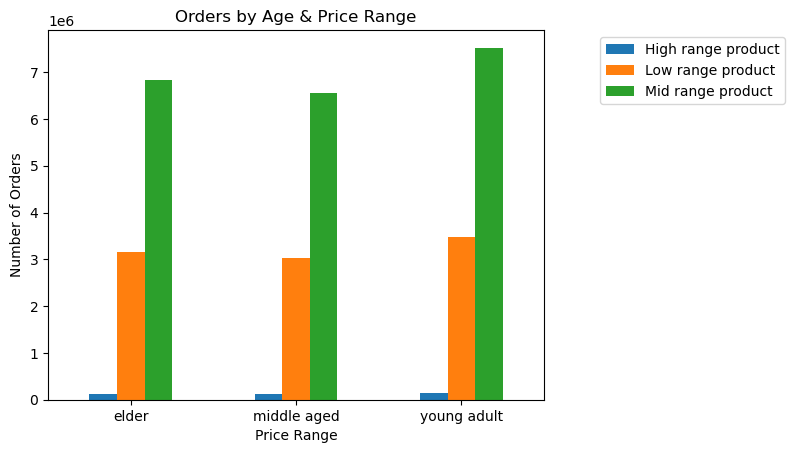

In [96]:
# Bar plot to observe the age category over different price ranges
age_price_range_plot=filtered_data.groupby(['age_category', 'price_range_loc']).size().unstack().plot(kind='bar')
plt.title('Orders by Age & Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))


In [97]:
# Saving the visualization as png file
age_price_range_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_price_range_plot.png'))

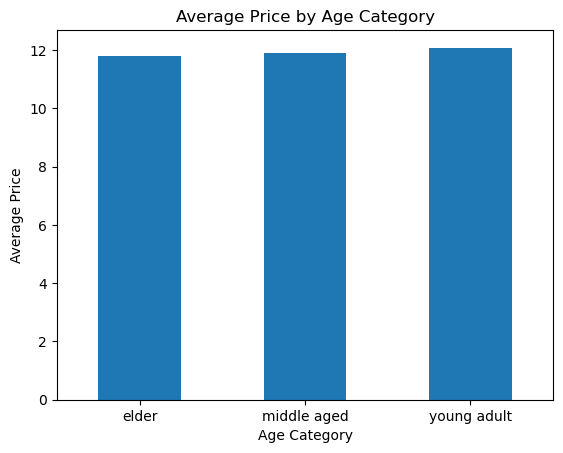

In [98]:
# Plot showing average prices vs age category
age_average_price_plot=filtered_data.groupby('age_category')['prices'].mean().plot(kind='bar')
plt.title('Average Price by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0, ha='center')
plt.grid(False)

In [99]:
# Saving the visualization as png file
age_average_price_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_average_price_plot.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'elder'), Text(1, 0, 'middle aged'), Text(2, 0, 'young adult')])

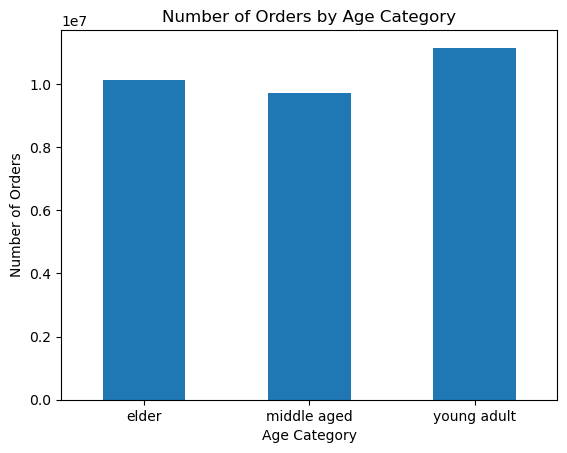

In [100]:
# Plot for age category order counts
age_orders_count_plot=filtered_data.groupby('age_category')['order_id'].count().plot(kind='bar')
plt.title('Number of Orders by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.xticks(rotation=0, ha='center')

In [101]:
# Saving the visualization as png file
age_orders_count_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_orders_count_plot.png'))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

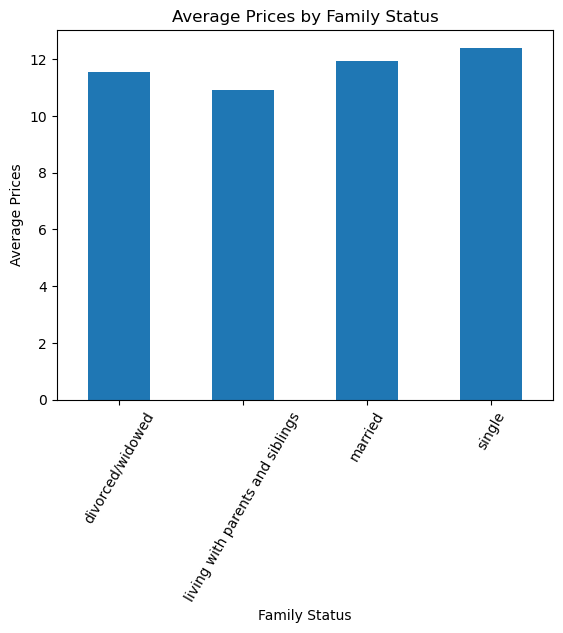

In [102]:
# Plot showing average prices vs family status

family_status_average_prices_plot=filtered_data.groupby('family_status')['prices'].mean().plot(kind='bar')
plt.title('Average Prices by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Prices')
plt.grid(False)
plt.xticks(rotation=60, ha='center')


In [103]:
# Saving the visualization as png file
family_status_average_prices_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_average_prices_plot.png'))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

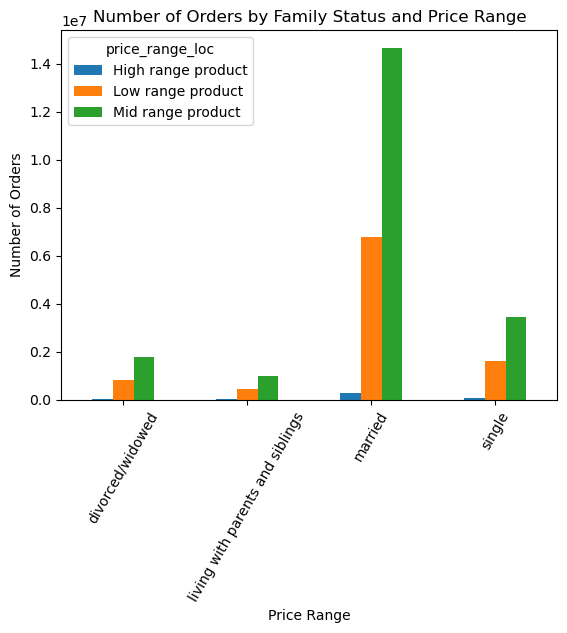

In [104]:
# Bar plot to observe the family status over different price ranges
family_status_prices_plot=filtered_data.groupby(['family_status', 'price_range_loc']).size().unstack().plot(kind='bar')
plt.title('Number of Orders by Family Status and Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.grid(False)
plt.xticks(rotation=60, ha='center')


In [105]:
# Saving the visualization as png file
family_status_prices_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_prices_plot.png'))

# Ordering habits by income

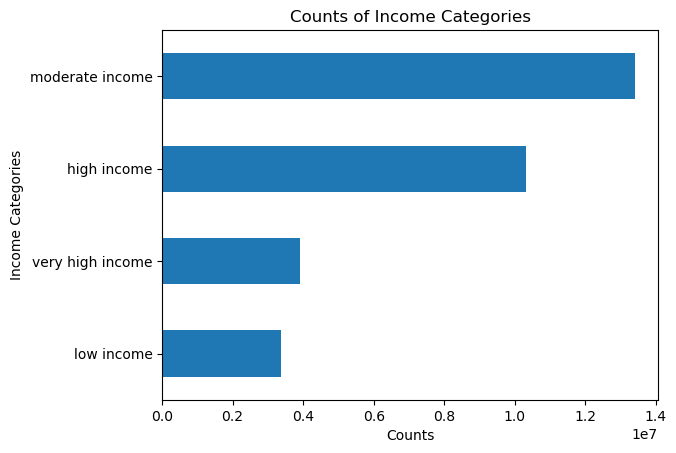

In [106]:
# Plot showing total counts of income categories
income_counts_plot=filtered_data['income_category'].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Counts of Income Categories')
plt.xlabel('Counts')
plt.ylabel('Income Categories')
plt.grid(False)

In [107]:
# Saving the visualization as png file
income_counts_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_counts_plot.png'))

(array([0, 1, 2, 3]),
 [Text(0, 0, 'high income'),
  Text(1, 0, 'low income'),
  Text(2, 0, 'moderate income'),
  Text(3, 0, 'very high income')])

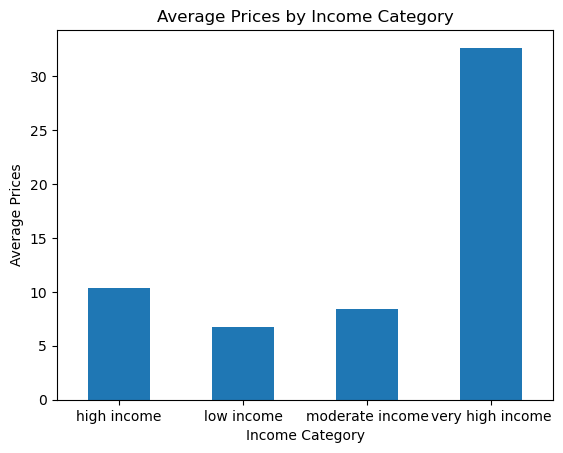

In [108]:
# Plot for average prices in income categories
income_average_prices_plot=filtered_data.groupby('income_category')['prices'].mean().plot(kind='bar')
plt.title('Average Prices by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Prices')
plt.grid(False)
plt.xticks(rotation=0, ha='center')

In [109]:
# Saving the visualization as png file
income_average_prices_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_average_prices_plot.png'))

<Axes: xlabel='Age', ylabel='income'>

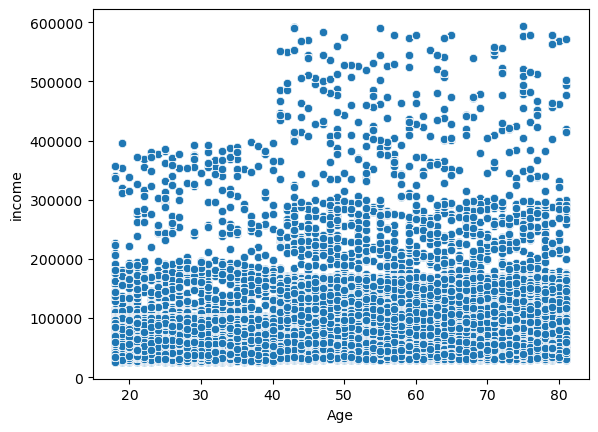

In [110]:
# Scatterplot to understand relation between age and income influencing the order habits
sns.scatterplot(x='Age',y='income',data=filtered_data)